# TP n°5 - Analyse en composantes principales

Références utiles :
- [Site scikit-learn - ACP](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

Objectif de ce TP:
- Comprendre le principe de l'analyse en composantes principales en utilisant la bibliothèque Scikit-learn.
- Réduire l'ensemble des composantes qui expliquent le dataset (nuage des points).

# Présentation de l'ACP dans sklearn
Avant d'appliquer une ACP, il est nécessaire de commencer par une standardisation des données afin de centrer et normaliser les données.

[Le centrage et la réduction des variables ("standardization") avec scikit-learn](http://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling)


## Question
Récuperer le fichier `sales.csv` et construisez un dataset.
Appliquer une ACP sur ce dataset.
**NB:** Si nécessaire, vous pouvez commencer par une étape de preprocessing (transformation des variables).

## Correction

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('sales.csv')

# Label Encoder
label_encoder = LabelEncoder()
df['division'] = label_encoder.fit_transform(df['division'])
df['level of education'] = label_encoder.fit_transform(df['level of education'])
df.head(2)

,division,level of education,training level,work experience,salary,sales
0,4,0,0,7,82712,307122
1,4,4,2,3,75645,221423


In [2]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

# Standardisation
df_scaled = preprocessing.scale(df)

# Application de l'ACP
pca = PCA(n_components=2, random_state=42)
pca.fit(df_scaled)

PCA(n_components=2, random_state=42)

### Question
Afficher avec un `print` le ourcentage de variance expliquée pour chaque composante principale de l'ACP appliquée

### Correction


In [4]:
print("Pourcentage de variance expliquée : ")
print(pca.explained_variance_ratio_)

Pourcentage de variance expliquée : 
[0.47431865 0.17573065]
Composantes principales : 
[[-0.10088607 -0.0158693   0.25602046  0.51495423  0.57122464  0.57666995]
 [-0.01163502  0.58252107  0.72270593 -0.33523128 -0.11791597  0.10929677]]


## Question
Utiliser un graphique adéquat pour visualiser le pourcentage de la variance expliquée par composante principale.

## Correction

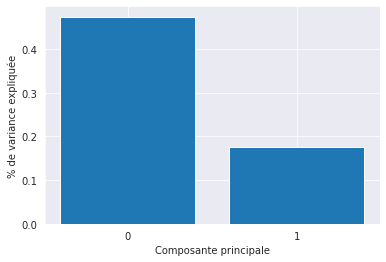

In [142]:
ratios = pca.explained_variance_ratio_
plt.bar(range(len(ratios)), ratios)
plt.xticks(range(len(ratios)))
plt.xlabel("Composante principale")
plt.ylabel("% de variance expliquée")
plt.show()

In [144]:
df_pca = pca.transform(df_scaled)
df_pca.shape

(1000, 2)

## Question
Utiliser un graphique adéquat pour afficher le nuage des points sur les 2 axes princiapales de l'ACP.

## Correction

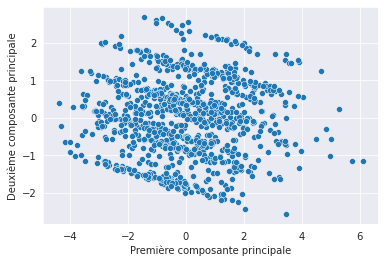

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.xlabel("Première composante principale")
plt.ylabel("Deuxième composante principale")
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1])
plt.show()

# ACP sur des données réelles

### Question
- Récupérer le dataset `breast_cancer` depuis les datasets de sklearn.
- Récupérer la data du dataset dans une variable `X`
- Appliquer une standardisation sur les données `X`

In [88]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

df = datasets.load_breast_cancer()

# Standardiser les données
X = df.data
y = df.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Question
Effectuez une ACP sur 2 composantes principales sur les données standardisées.

## Correction

In [89]:
# Création du modèle ACP
model = PCA(n_components=2, random_state=42)
model.fit(X_scaled)

PCA(n_components=2, random_state=42)

### Question
Utilisez un barplot pour afficher les ratios des variances expliquées du modèle ACP déjà créé.

### Correction

ratios: [0.44272026 0.18971182]


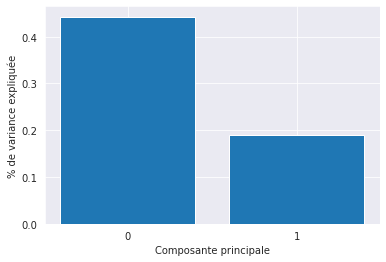

In [119]:
ratios = model.explained_variance_ratio_
print(f"ratios: {ratios}")
plt.bar(range(len(ratios)), ratios)
plt.xticks(range(len(ratios)))
plt.xlabel("Composante principale")
plt.ylabel("% de variance expliquée")
plt.show()

In [112]:
X_pca = model.fit_transform(X_scaled)

### Question
Affichez les dimensions des données avant et après l'ACP.

### Correction

In [114]:
print(f"Les dimensions d'origine: {X_scaled.shape}")
print(f"Les dimensions après ACP: {X_pca.shape}")

Les dimensions d'origine: (569, 30)
Les dimensions après ACP: (569, 2)


### Question
Afficher la nouvelle distribution après ACP.

### Correction

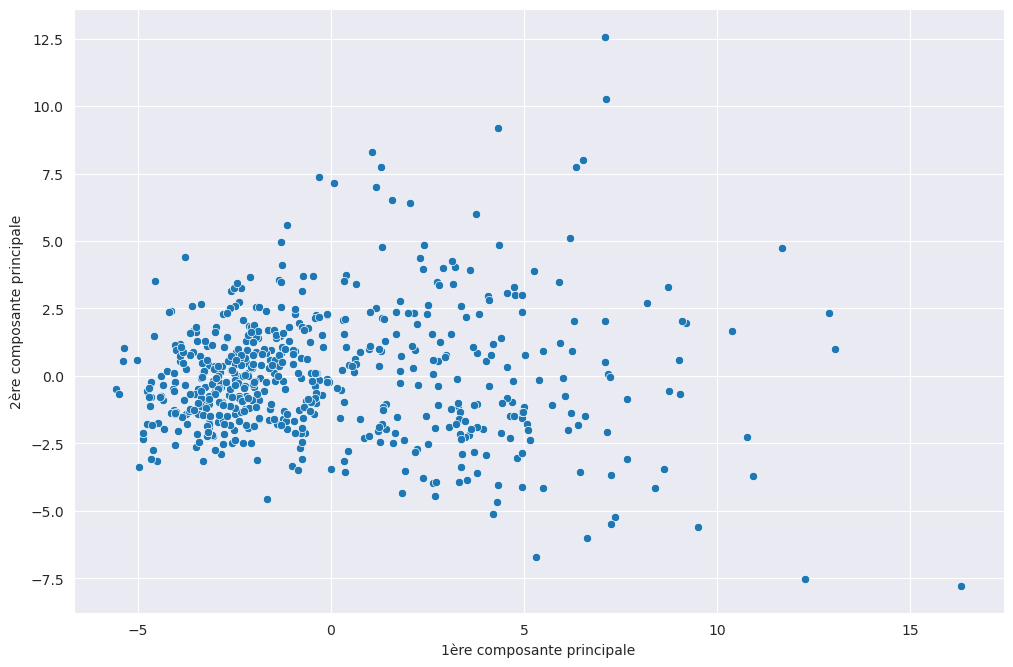

In [120]:
# Data viz
plt.figure(dpi=100, figsize=(12,8))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1])
plt.xlabel("1ère composante principale")
plt.ylabel("2ère composante principale")
plt.show()
